In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
run = wandb.init(project="isic_lesions_24")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: ayush-thakur. Use `wandb login --relogin` to force relogin


In [4]:
train_metadata_df = pd.read_csv("../data/train-metadata.csv")

/tmp/ipykernel_2479709/2139135023.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata_df = pd.read_csv("../data/train-metadata.csv")


In [5]:
train_metadata_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [6]:
train_metadata_df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [16]:
train_metadata_df[['iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']]["iddx_full"].value_counts()

iddx_full
Benign                                                                                                                                                           399991
Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark                                                                             228
Benign::Benign melanocytic proliferations::Nevus                                                                                                                    141
Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular                                             98
Indeterminate::Indeterminate melanocytic proliferations::Atypical melanocytic neoplasm                                                                               64
Benign::Benign epidermal proliferations::Seborrheic keratosis                                                                                         

In [5]:
train_metadata_df.tbp_lv_areaMM2.value_counts()

tbp_lv_areaMM2
3.996998     763
4.203415     745
4.428598     729
3.846876     726
4.222181     722
            ... 
65.303059      1
76.168137      1
49.277540      1
40.570464      1
71.458060      1
Name: count, Length: 8029, dtype: int64

In [11]:
len(train_metadata_df), len(os.listdir("../data/train-image/image")), len(set(train_metadata_df.isic_id.values))

(401059, 401059, 401059)

In [4]:
train_metadata_df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [13]:
summary_stats = train_metadata_df.describe()

In [34]:
# logged to W&B for better visualization
run.log({"summary_stats": summary_stats})

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


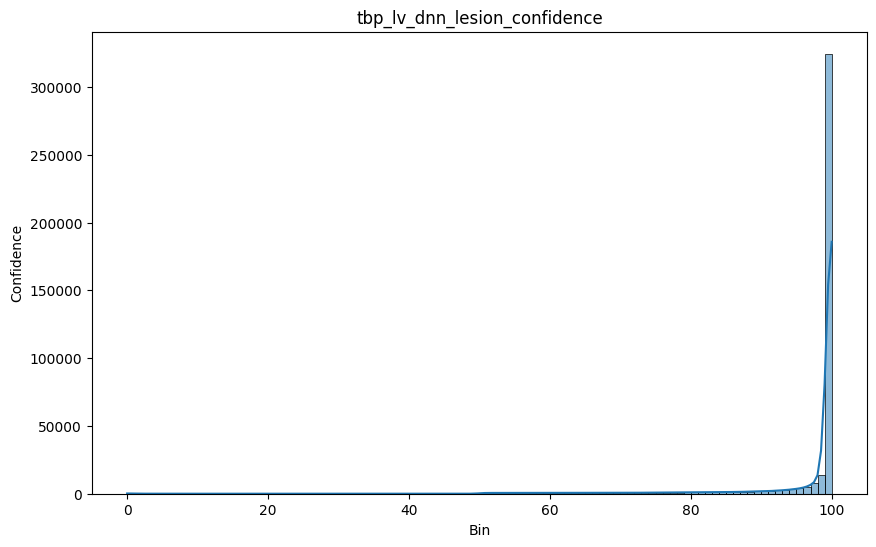

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train_metadata_df['tbp_lv_dnn_lesion_confidence'], bins=100, kde=True)
plt.title('tbp_lv_dnn_lesion_confidence')
plt.xlabel('Bin')
plt.ylabel('Confidence')
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


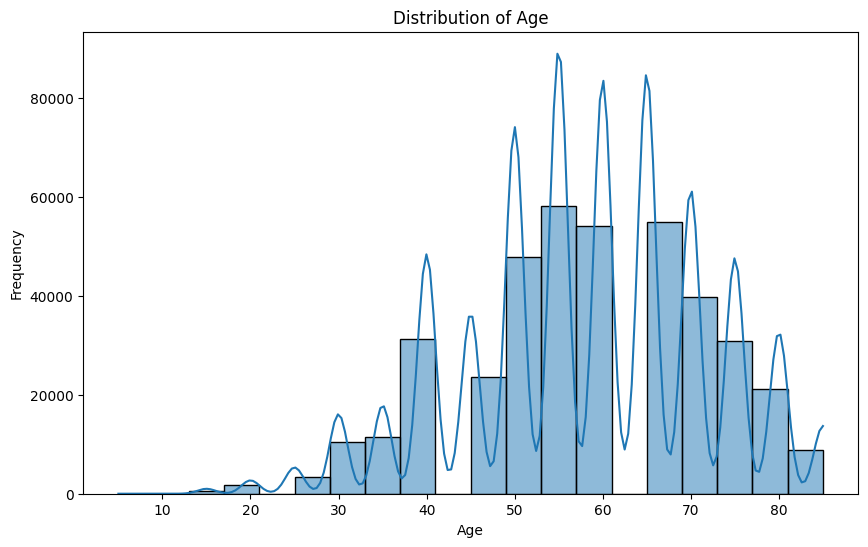

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train_metadata_df['age_approx'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

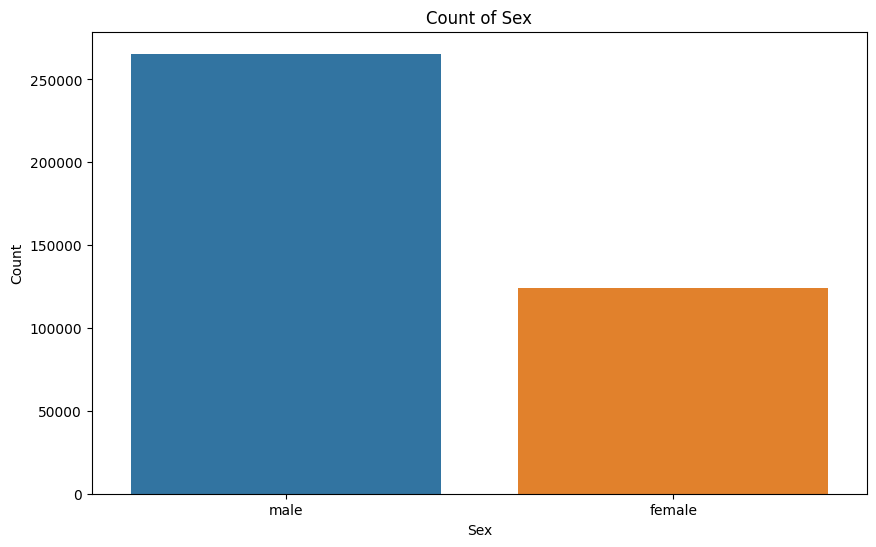

In [23]:
# Count plot for sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=train_metadata_df)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

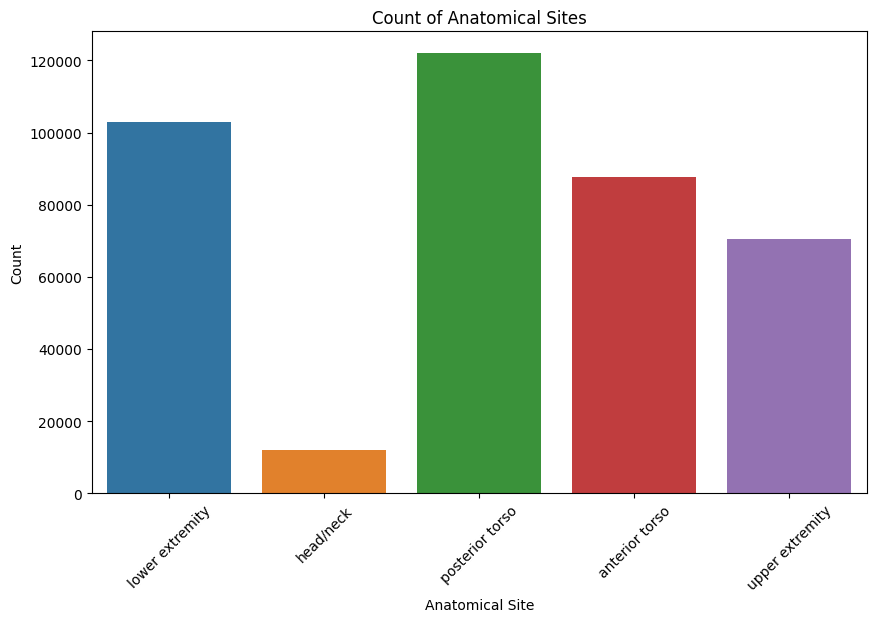

In [24]:
# Count plot for anatom_site_general
plt.figure(figsize=(10, 6))
sns.countplot(x='anatom_site_general', data=train_metadata_df)
plt.title('Count of Anatomical Sites')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


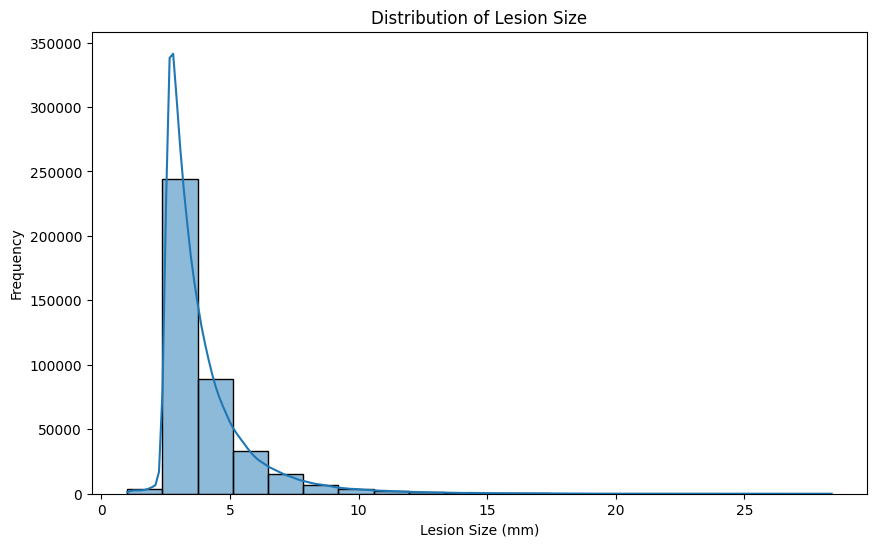

In [25]:
# Distribution of clin_size_long_diam_mm
plt.figure(figsize=(10, 6))
sns.histplot(train_metadata_df['clin_size_long_diam_mm'], bins=20, kde=True)
plt.title('Distribution of Lesion Size')
plt.xlabel('Lesion Size (mm)')
plt.ylabel('Frequency')
plt.show()

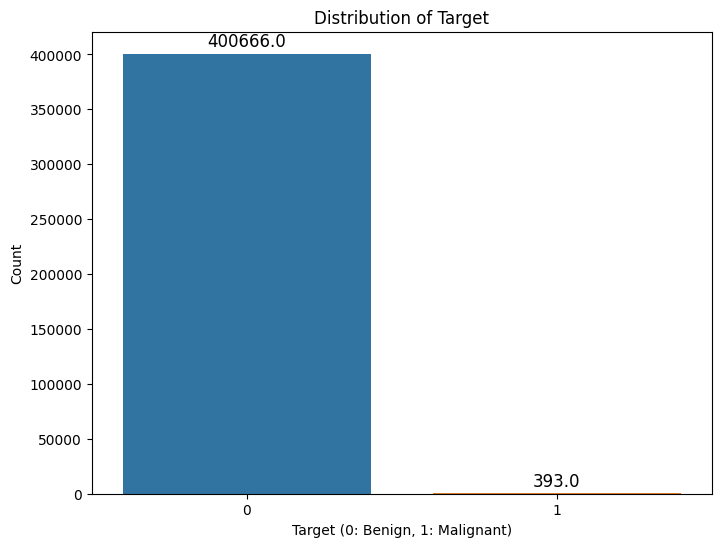

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=train_metadata_df)
plt.title('Distribution of Target')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Count')

# Adding the count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


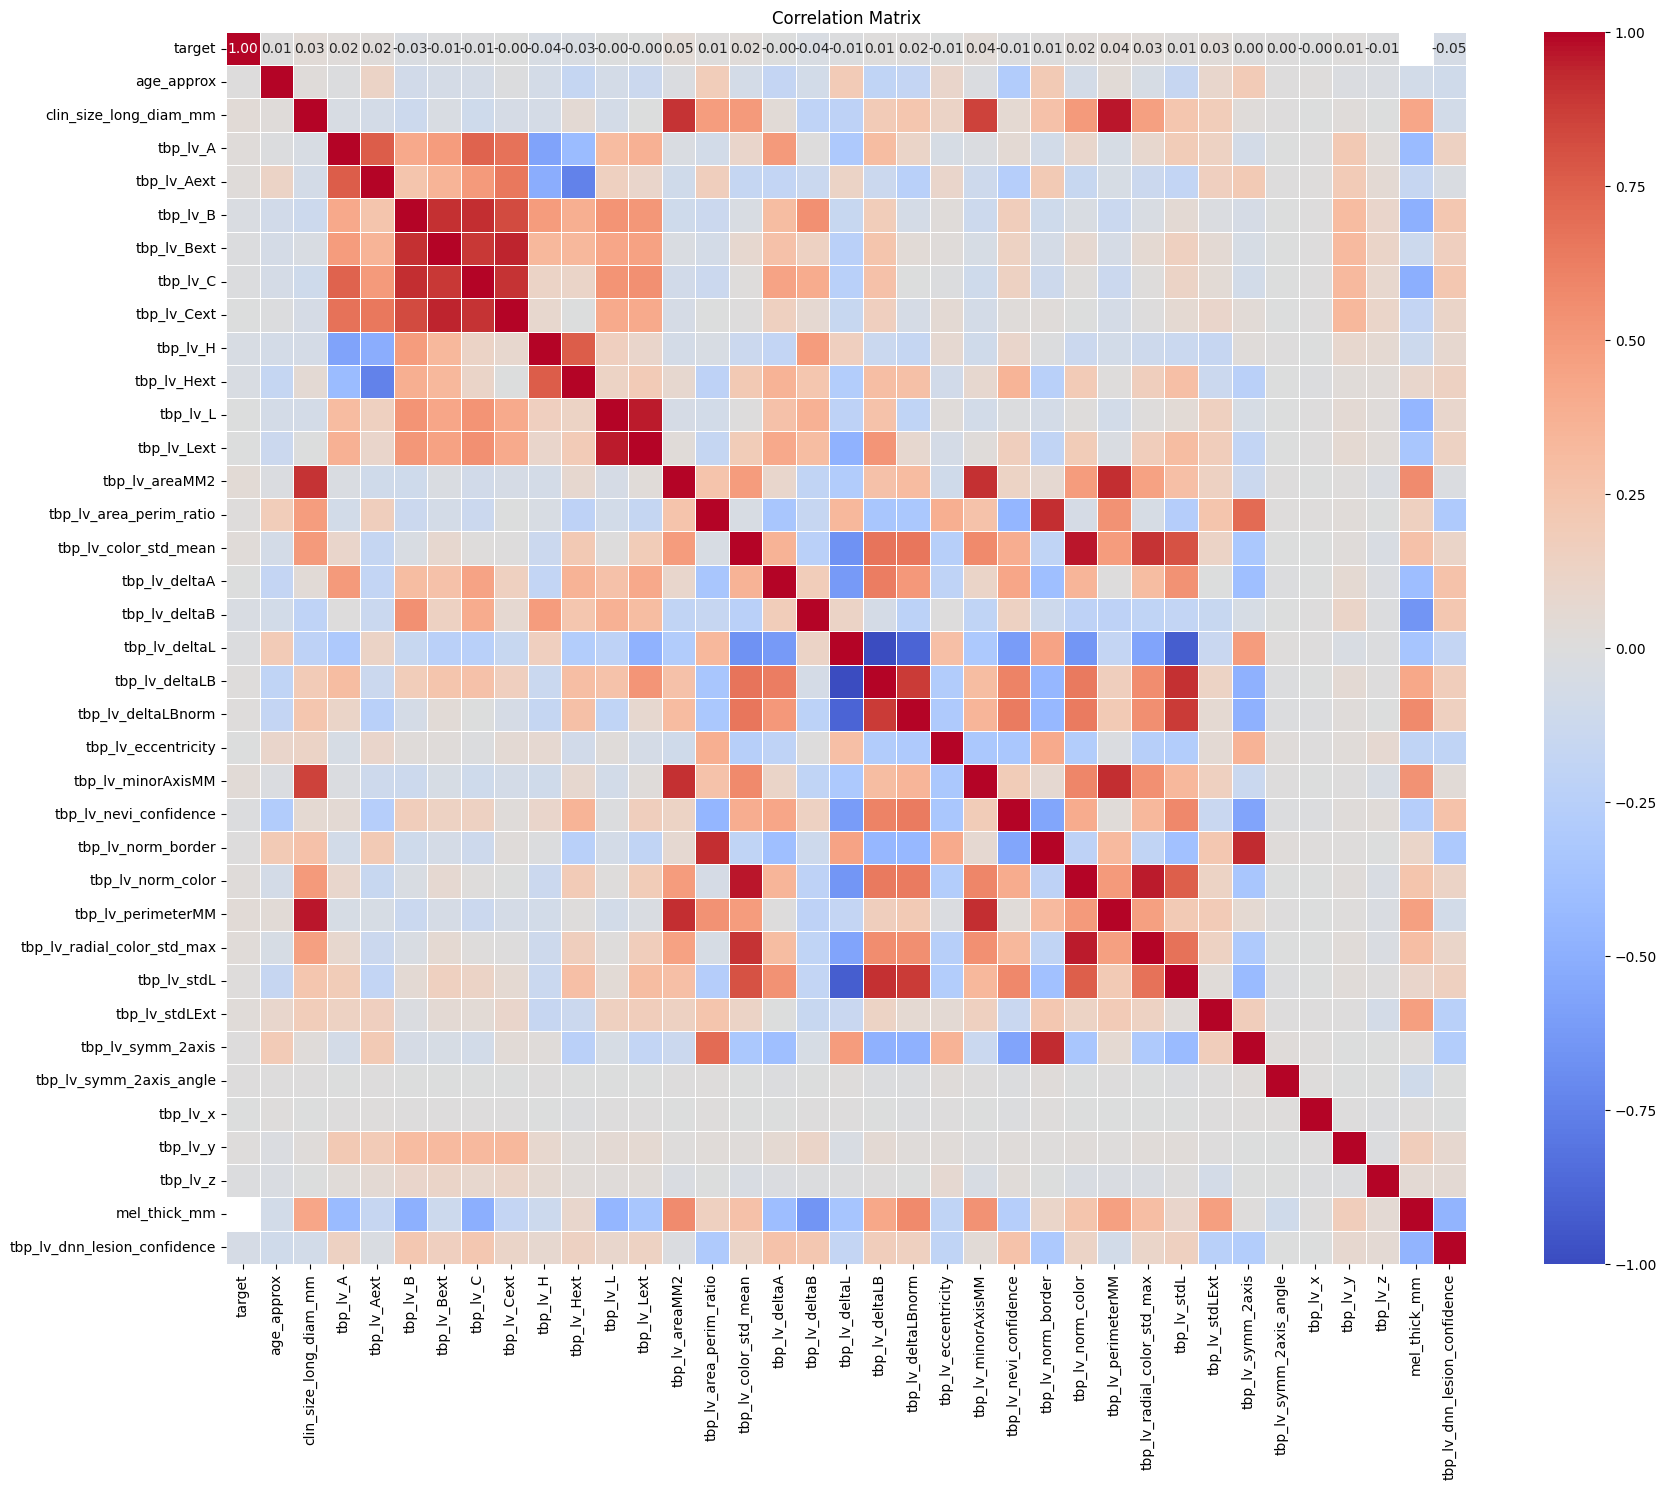

In [40]:
numeric_df = train_metadata_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [41]:
# Get the correlation of each column with the target
target_correlations = correlation_matrix["target"].sort_values(ascending=False)

# Print the correlations
print(target_correlations)

target                          1.000000
tbp_lv_areaMM2                  0.045139
tbp_lv_perimeterMM              0.036188
tbp_lv_minorAxisMM              0.035757
clin_size_long_diam_mm          0.032682
tbp_lv_stdLExt                  0.026084
tbp_lv_radial_color_std_max     0.025441
tbp_lv_color_std_mean           0.024271
tbp_lv_Aext                     0.023206
tbp_lv_norm_color               0.022264
tbp_lv_A                        0.019788
tbp_lv_deltaLBnorm              0.015172
tbp_lv_stdL                     0.012669
tbp_lv_deltaLB                  0.012237
tbp_lv_y                        0.009926
tbp_lv_area_perim_ratio         0.009624
age_approx                      0.007734
tbp_lv_norm_border              0.006747
tbp_lv_symm_2axis               0.002583
tbp_lv_symm_2axis_angle         0.000867
tbp_lv_Lext                    -0.000417
tbp_lv_Cext                    -0.000807
tbp_lv_deltaA                  -0.001046
tbp_lv_x                       -0.002652
tbp_lv_L        

In [8]:
anatom_site_distribution = train_metadata_df['anatom_site_general'].value_counts()
anatom_site_distribution

anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
Name: count, dtype: int64

In [9]:
anatom_sites_malignant = train_metadata_df[train_metadata_df['target'] == 1]['anatom_site_general'].value_counts()
anatom_sites_malignant

anatom_site_general
posterior torso    103
anterior torso      82
head/neck           78
lower extremity     73
upper extremity     57
Name: count, dtype: int64

In [8]:
print("Total number of patients: ", len(train_metadata_df.patient_id.value_counts()))

Total number of patients:  1042


In [ ]:
total_columns = train_metadata_df.columns
continuous_features = train_metadata_df.select_dtypes(include=['float64', 'int64']).columns
ordinal_features = ["sex", "anatom_site_general", "tbp_lv_location", "tbp_lv_location_simple"]


print(f"Total columns: {len(total_columns)} | continuous features: {len(continuous_features)} | selected ordinal features: {len(ordinal_features)}")

In [8]:
extra_df = pd.read_csv("../data/extra/extra_metadata.csv")
extra_df.rename(columns={"benign_malignant": "target"}, inplace=True)

/tmp/ipykernel_1132759/45300465.py:1: DtypeWarning: Columns (8,13,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  extra_df = pd.read_csv("../data/extra/extra_metadata.csv")


In [9]:
extra_df.columns

Index(['isic_id', 'attribution', 'copyright_license', 'acquisition_day',
       'age_approx', 'anatom_site_general', 'target', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis',
       'diagnosis_confirm_type', 'family_hx_mm', 'fitzpatrick_skin_type',
       'image_type', 'lesion_id', 'mel_class', 'mel_mitotic_index',
       'mel_thick_mm', 'mel_type', 'mel_ulcer', 'melanocytic', 'nevus_type',
       'patient_id', 'personal_hx_mm', 'pixels_x', 'pixels_y', 'sex'],
      dtype='object')

In [16]:
extra_df.diagnosis.value_counts()

diagnosis
nevus                                 32697
melanoma                               7349
basal cell carcinoma                   4921
seborrheic keratosis                   1926
squamous cell carcinoma                1372
actinic keratosis                      1367
pigmented benign keratosis             1339
solar lentigo                           562
dermatofibroma                          420
vascular lesion                         348
lichenoid keratosis                     312
acrochordon                             301
lentigo NOS                             241
atypical melanocytic proliferation      143
AIMP                                    121
verruca                                 119
angioma                                  71
lentigo simplex                          43
melanoma metastasis                      39
other                                    33
scar                                     31
neurofibroma                             26
angiokeratoma         

In [10]:
train_metadata_24_cols = train_metadata_df.columns
extra_metadata_cols = extra_df.columns

set(train_metadata_24_cols) & set(extra_metadata_cols)

{'age_approx',
 'anatom_site_general',
 'attribution',
 'clin_size_long_diam_mm',
 'copyright_license',
 'image_type',
 'isic_id',
 'lesion_id',
 'mel_mitotic_index',
 'mel_thick_mm',
 'patient_id',
 'sex',
 'target'}

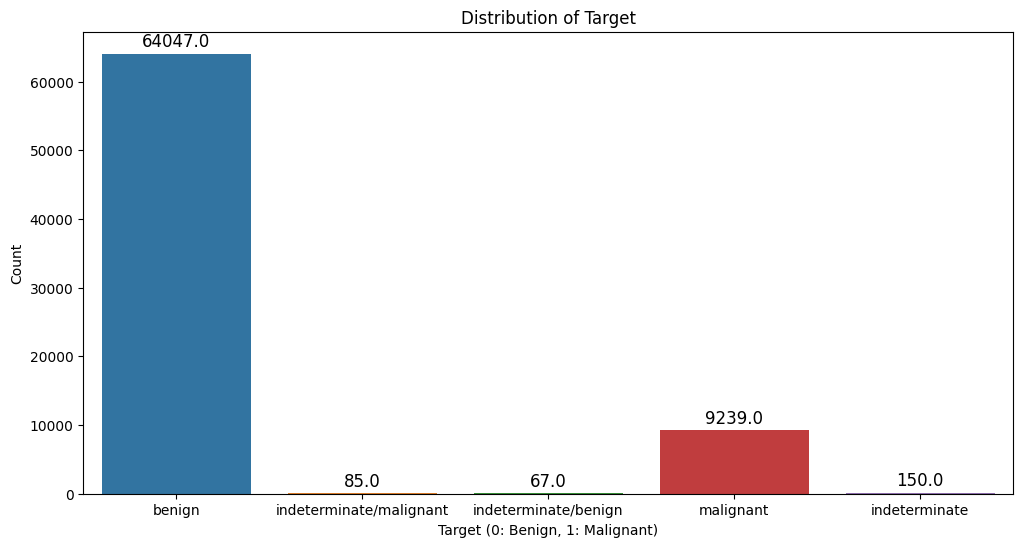

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target column
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='target', data=extra_df)
plt.title('Distribution of Target')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Count')

# Adding the count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [19]:
train_metadata_df.tbp_lv_symm_2axis.value_counts()

tbp_lv_symm_2axis
0.250000    2236
0.200000    1549
0.500000    1173
0.333333    1128
0.333333    1096
            ... 
0.096591       1
0.106901       1
0.518660       1
0.226394       1
0.433058       1
Name: count, Length: 74825, dtype: int64

0.303571428571429 0.2822581


/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


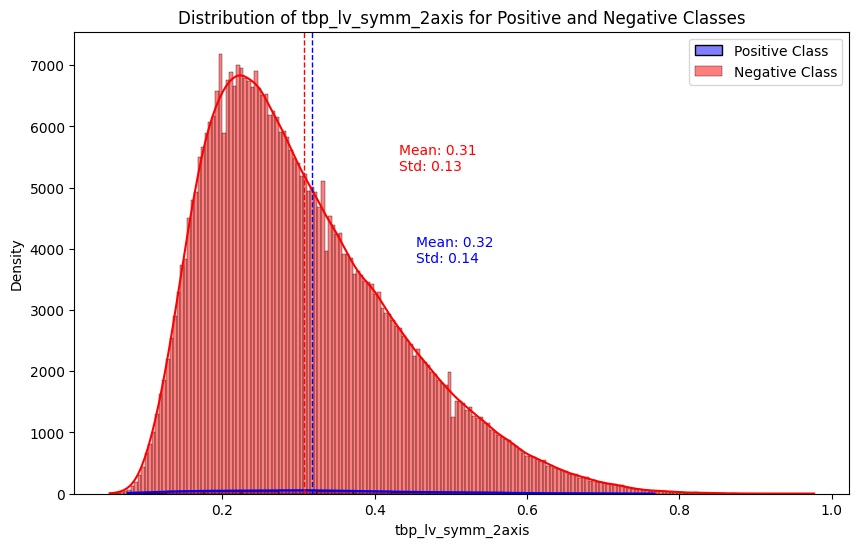

In [25]:
# Calculate statistics
mean_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_symm_2axis'].mean()
std_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_symm_2axis'].std()
median_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_symm_2axis'].median()
mean_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_symm_2axis'].mean()
std_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_symm_2axis'].std()
median_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_symm_2axis'].median()

print(median_positive, median_negative)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_symm_2axis'], color='blue', label='Positive Class', kde=True, alpha=0.5)
sns.histplot(train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_symm_2axis'], color='red', label='Negative Class', kde=True, alpha=0.5)

# Add statistical information
plt.axvline(mean_positive, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_negative, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive + std_positive, plt.ylim()[1] * 0.5, f'Mean: {mean_positive:.2f}\nStd: {std_positive:.2f}', color='blue')
plt.text(mean_negative + std_negative, plt.ylim()[1] * 0.7, f'Mean: {mean_negative:.2f}\nStd: {std_negative:.2f}', color='red')

# Add title and labels
plt.title('Distribution of tbp_lv_symm_2axis for Positive and Negative Classes')
plt.xlabel('tbp_lv_symm_2axis')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [20]:
train_metadata_df.tbp_lv_norm_border.value_counts()

tbp_lv_norm_border
10.000000    607
2.469136      10
3.703704       9
1.851852       8
1.851852       8
            ... 
5.234977       1
2.657277       1
3.928597       1
7.009204       1
2.852828       1
Name: count, Length: 391372, dtype: int64

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


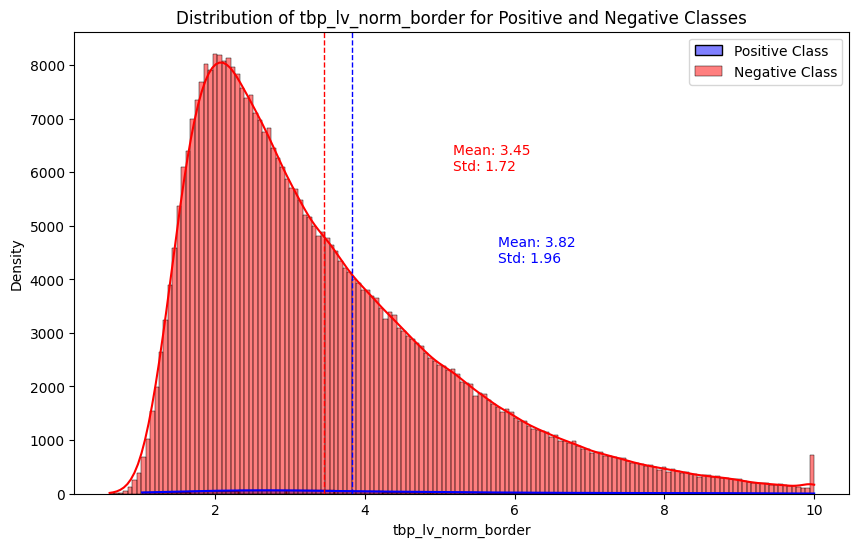

In [23]:
# Calculate statistics
mean_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_norm_border'].mean()
std_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_norm_border'].std()
mean_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_norm_border'].mean()
std_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_norm_border'].std()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_norm_border'], color='blue', label='Positive Class', kde=True, alpha=0.5)
sns.histplot(train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_norm_border'], color='red', label='Negative Class', kde=True, alpha=0.5)

# Add statistical information
plt.axvline(mean_positive, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_negative, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive + std_positive, plt.ylim()[1] * 0.5, f'Mean: {mean_positive:.2f}\nStd: {std_positive:.2f}', color='blue')
plt.text(mean_negative + std_negative, plt.ylim()[1] * 0.7, f'Mean: {mean_negative:.2f}\nStd: {std_negative:.2f}', color='red')

# Add title and labels
plt.title('Distribution of tbp_lv_norm_border for Positive and Negative Classes')
plt.xlabel('tbp_lv_norm_border')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [26]:
train_metadata_df.tbp_lv_radial_color_std_max.value_counts()

tbp_lv_radial_color_std_max
0.000000    29733
1.118353        4
1.021559        4
1.035375        4
1.200694        4
            ...  
2.605414        1
1.530980        1
1.645100        1
1.031166        1
1.161658        1
Name: count, Length: 367566, dtype: int64

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


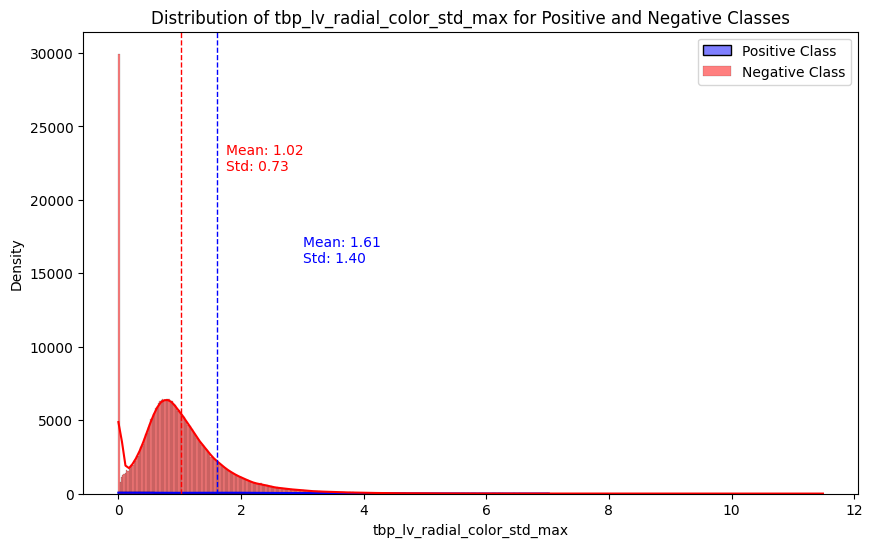

In [27]:
# Calculate statistics
mean_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_radial_color_std_max'].mean()
std_positive = train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_radial_color_std_max'].std()
mean_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_radial_color_std_max'].mean()
std_negative = train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_radial_color_std_max'].std()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_metadata_df[train_metadata_df['target'] == 1]['tbp_lv_radial_color_std_max'], color='blue', label='Positive Class', kde=True, alpha=0.5)
sns.histplot(train_metadata_df[train_metadata_df['target'] == 0]['tbp_lv_radial_color_std_max'], color='red', label='Negative Class', kde=True, alpha=0.5)

# Add statistical information
plt.axvline(mean_positive, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mean_negative, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive + std_positive, plt.ylim()[1] * 0.5, f'Mean: {mean_positive:.2f}\nStd: {std_positive:.2f}', color='blue')
plt.text(mean_negative + std_negative, plt.ylim()[1] * 0.7, f'Mean: {mean_negative:.2f}\nStd: {std_negative:.2f}', color='red')

# Add title and labels
plt.title('Distribution of tbp_lv_radial_color_std_max for Positive and Negative Classes')
plt.xlabel('tbp_lv_radial_color_std_max')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()